### IMPORT LIBRARIES :

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### LOAD DATA:

In [2]:
df = pd.read_csv("Admission_Predict_Data.csv")

The dataset contains several parameters which are considered important during the application for Masters Programs.
The parameters included are :

    GRE Scores ( out of 340 )
    TOEFL Scores ( out of 120 )
    University Rating ( out of 5 )
    Statement of Purpose and Letter of Recommendation Strength ( out of 5 )
    Undergraduate GPA ( out of 10 )
    Research Experience ( either 0 or 1 )
    Chance of Admit ( ranging from 0 to 1 )

In [3]:
df.head(8)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68


In [4]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [5]:
df.drop('Serial No.',axis=1,inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.shape

(500, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


##### Observation:
    University Rating and Research both are categorical columns and rest are numerical.

### EXPLORATORY  DATA ANALYSIS:

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


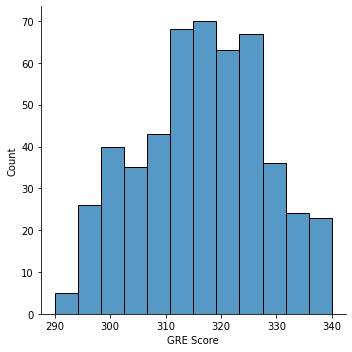

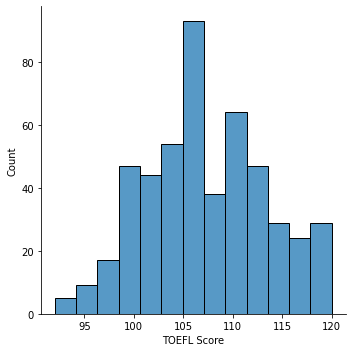

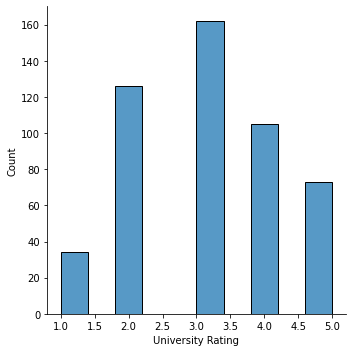

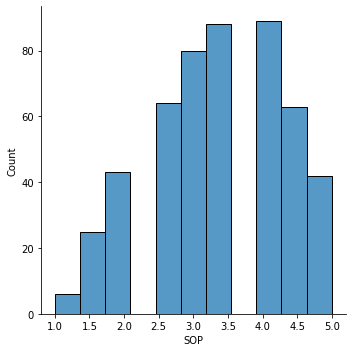

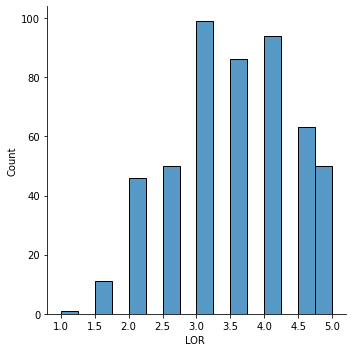

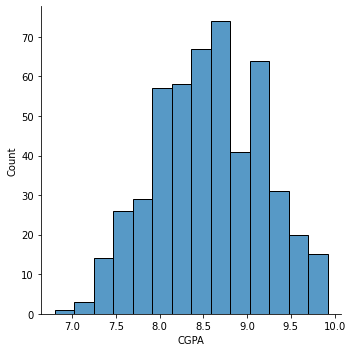

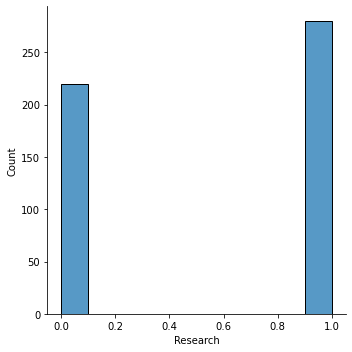

In [9]:
#Distribution plot of all independent variables
[sns.displot(df[i]) for i in list(df.columns)[:-1]]

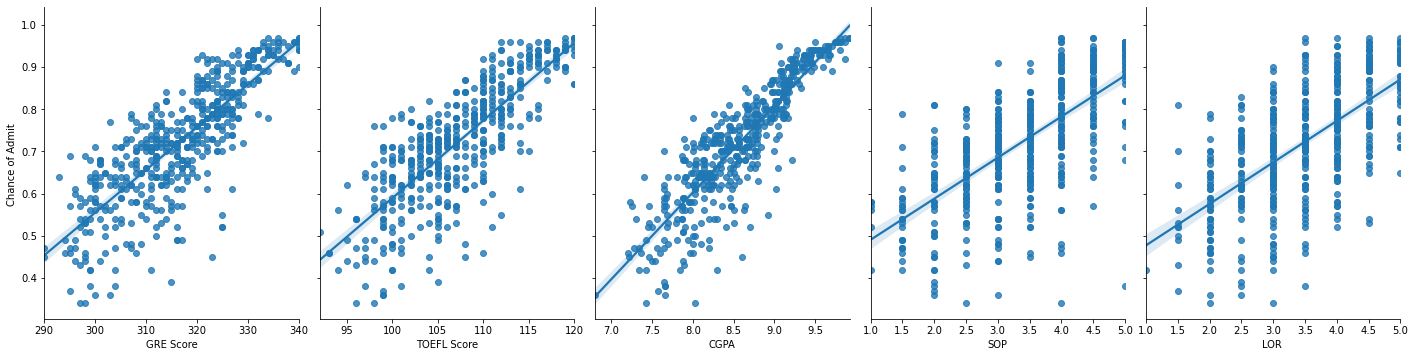

In [10]:
#Pairplot of each independent numrical variable with dependent variable 
sns.pairplot(df,x_vars=['GRE Score','TOEFL Score','CGPA','SOP','LOR '],y_vars=['Chance of Admit '],height=5, aspect=.8, kind='reg')

In [11]:
#correlation of all variables
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


<AxesSubplot:>

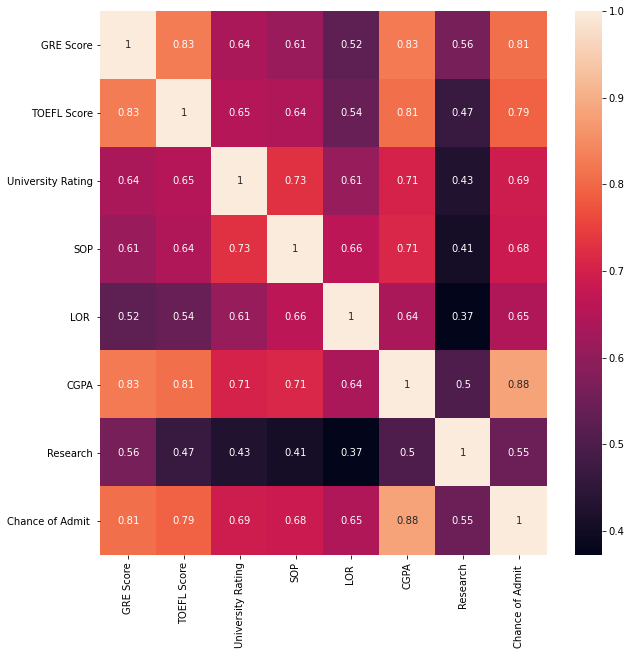

In [12]:
#heatmap of correlation data of all variables
plt.figure(figsize = (10,10))
sns.heatmap(df.corr(), annot=True)

### VARIABLE SELECTION:

In [13]:
list(df.columns)

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

In [14]:
#independent variable selection
x = df[['GRE Score','TOEFL Score','SOP','LOR ','CGPA']]
x

,GRE Score,TOEFL Score,SOP,LOR,CGPA
0,337,118,4.5,4.5,9.65
1,324,107,4.0,4.5,8.87
2,316,104,3.0,3.5,8.00
3,322,110,3.5,2.5,8.67
4,314,103,2.0,3.0,8.21
...,...,...,...,...,...
495,332,108,4.5,4.0,9.02
496,337,117,5.0,5.0,9.87
497,330,120,4.5,5.0,9.56
498,312,103,4.0,5.0,8.43


In [15]:
#dependent variable selection
y=df[['Chance of Admit ']]
y

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65
...,...
495,0.87
496,0.96
497,0.93
498,0.73


### TRAINING AND TESTING DATA:

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=0)

In [18]:
x_train.shape

(400, 5)

In [19]:
y_train.shape

(400, 1)

### MODEL SELECTION:

In [20]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()

In [21]:
Model.fit(x_train,y_train)

LinearRegression()

### MODEL PREDICTION:

In [22]:
y_pred=Model.predict(x_test)

In [23]:
y_pred[:10]

array([[0.65837287],
       [0.85240971],
       [0.76898608],
       [0.87392044],
       [0.57617348],
       [0.65425063],
       [0.53049811],
       [0.70513767],
       [0.52966893],
       [0.76665308]])

In [24]:
y_test.head(10)

,Chance of Admit
90,0.64
254,0.85
283,0.80
445,0.91
461,0.68
15,0.54
316,0.54
489,0.65
159,0.52
153,0.79


### MODEL SCORE:

In [25]:
print("Model training score :",round(Model.score(x_train,y_train),2)*100, '%')

Model training score : 83.0 %


In [26]:
print("Model testing score :",round(Model.score(x_test,y_test),2)*100, '%')

Model testing score : 76.0 %


In [27]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))   #95% prediction

0.04753418930877186


In [28]:
print("Model Accuracy : ",round((1 - metrics.mean_absolute_error(y_test,y_pred)), 2)*100,"%")

Model Accuracy :  95.0 %


### SAVE MODEL:

In [29]:
import pickle

# Save to file in the current working directory
pkl_filename = "Model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(Model, file)